# Cox Proportional Hazard Regression CPHR

Supervised learning technique for data mining. It helps to determine the relationship between the survival time of a patient/subject and one or more predictor variables.

**Formula:**
$$h(t)=h_0(t)*exp(b_1*x_1+b_n+x_n)$$  


<p style='text-align: center;'>
where 
$$h_0(t) =$$  baseline hazard,
$$b_n=$$  impact coefficients and 
$$x_n=$$ covariantes
$$exp(b_n)=$$ Hazard Ratio (HR)   
</p>

**Result interpretation:**
<pre>
HR>1 increase (the likelihood)
HR<1 decrease
HR=1 neutral 
</pre>

Survival analysis does not allow to include controls or regressors/drivers. At best, you can split in groups of gender, age, etc and perform a log-rank test. CPHR allows it.
In contrast, you can add regressors in CPHR

examples: With CPGR you can find out why a client does not renewal his credit card based on his credit history, behavior, etc.


## Case of study: Lung Cancer

In [1]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\2. Cox Proportional Hazard Regression

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\2. Cox Proportional Hazard Regression


#Libraries

In [2]:
#install library
!pip install lifelines

In [3]:
#import libraries
import pandas as pd

### 1. Prepare Datasets

In [4]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset = dataset.dropna() #drop NA.You have to remove NA or replace it by mean or sth
dataset.head()                                   

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [6]:
#transforming dependent variable
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1 # status: censoring status 1=censored, 2=dead (1 or 0 alive 2 or 1 dead)
dataset.head

<bound method NDFrame.head of      inst  time  status  age  ...  ph.karno  pat.karno  meal.cal  wt.loss
1     3.0   455       1   68  ...      90.0       90.0    1225.0     15.0
3     5.0   210       1   57  ...      90.0       60.0    1150.0     11.0
5    12.0  1022       0   74  ...      50.0       80.0     513.0      0.0
6     7.0   310       1   68  ...      70.0       60.0     384.0     10.0
7    11.0   361       1   71  ...      60.0       80.0     538.0      1.0
..    ...   ...     ...  ...  ...       ...        ...       ...      ...
221  11.0   203       0   71  ...      80.0       90.0    1025.0      0.0
224  13.0   191       0   39  ...      90.0       90.0    2350.0     -5.0
225  32.0   105       0   75  ...      60.0       70.0    1025.0      5.0
226   6.0   174       0   66  ...      90.0      100.0    1075.0      1.0
227  22.0   177       0   58  ...      80.0       90.0    1060.0      0.0

[167 rows x 10 columns]>

Variables:
- inst: Institution code
- time: Survival time in days (time a person survive)
- status: censoring status 1=censored, 2=dead (1 alive 2 dead)

characteristis of the person
- age: Age in years
- sex: Male=1 Female=2
- ph.ecog: ECOG performance score as rated by the physician. 0=asymptomatic, 1= symptomatic but completely ambulatory, 2= in bed <50% of the day, 3= in bed > 50% of the day but not bedbound, 4 = bedbound
- ph.karno: Karnofsky performance score (bad=0-good=100) rated by physician
- pat.karno: Karnofsky performance score as rated by patient
- meal.cal: Calories consumed at meals
- wt.loss: Weight loss in last six months

Example: the person 1 lived 306 days and now is dead. 

In [5]:
#remove instances variables
dataset = dataset.drop(columns = "inst")
dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,361,2,71,2,2.0,60.0,80.0,538.0,1.0


### 2. Cox Proportional Hazard

In [10]:
#CPH model
from lifelines import CoxPHFitter
model = CoxPHFitter()
model.fit(dataset,
          "time",
          event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-06-12 11:55:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

- exp(coef) = HR > < = 1
- coef sex = -0.55: if the sex=1, it decreases the likelihood
- coef wr.loss= -0.01: if someone lost weight, then he/she will die
- p<0.05: significance at 5% 



#Visualization

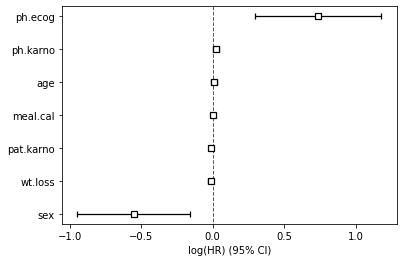

In [11]:
#visualizing model
model.plot()
# meal.car/age is overlaping = it is not statistically non-significant.
# ph.ecog and sex are very relevant 

## Case of study: Veterans' Administration Lung Cancer study

Randomised trial of two treatment regimens for lung cancer. This is a standard survival analysis data set.

### 1. Prepare Datasets

In [9]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\2. Cox Proportional Hazard Regression

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\2. Cox Proportional Hazard Regression


In [3]:
!pip install lifelines

In [4]:
#libraries
import pandas as pd

In [5]:
#import dataset
dataset = pd.read_csv("veteran.csv")
dataset.head()    

,trt,celltype,time,status,karno,diagtime,age,prior
0,1,squamous,72,1,60,7,69,0
1,1,squamous,411,1,70,5,64,10
2,1,squamous,228,1,60,3,38,0
3,1,squamous,126,1,60,9,63,10
4,1,squamous,118,1,70,11,65,10


- trt: 1=standard 2=test
- celltype: 1=squamous, 2=smallcell, 3=adeno, 4=large
- time: survival time
- status: censoring status
- karno: Karnofsky performance score (100=good)
- diagtime: months from diagnosis to randomisation
- age: in years
-  prior: prior therapy 0=no, 10=yes

In [6]:
#transform cell type
dataset = pd.get_dummies(dataset, drop_first=True) # convert-split celltype variable into 3 dummy variables
dataset.head()

,trt,time,status,karno,diagtime,age,prior,celltype_large,celltype_smallcell,celltype_squamous
0,1,72,1,60,7,69,0,0,0,1
1,1,411,1,70,5,64,10,0,0,1
2,1,228,1,60,3,38,0,0,0,1
3,1,126,1,60,9,63,10,0,0,1
4,1,118,1,70,11,65,10,0,0,1


### 2. Cox Proportional Hazard

In [7]:
#CPH
from lifelines import CoxPHFitter
model = CoxPHFitter()
model.fit(dataset, 
          "time",
          event_col = "status")
model.print_summary()

<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -474.40
         time fit was run = 2022-12-12 00:05:18 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
trt                  0.29       1.34       0.21            -0.11             0.70                 0.89                 2.02
karno               -0.03       0.97       0.01            -0.04            -0.02                 0.96                 0.98
diagtime             0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
age                 -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
prior                0.01       1.01       0.02            -0.04             0.05                 0.96                 1.05
celltype_large      -0.79       0.45       0.30            -1.39            -0.20                 0.25                 0.82
celltype_smallcell  -0.33       0.72       0.28            -0.88             0.21                 0.42                 1.23
celltype_squamous   -1.20       0.30       0.30            -1.79            -0.61                 0.17                 0.55

                     cmp to     z      p   -log2(p)
covariate                                          
trt                    0.00  1.42   0.16       2.68
karno                  0.00 -5.96 <0.005      28.55
diagtime               0.00  0.01   0.99       0.01
age                    0.00 -0.94   0.35       1.52
prior                  0.00  0.31   0.76       0.40
celltype_large         0.00 -2.62   0.01       6.85
celltype_smallcell     0.00 -1.21   0.23       2.15
celltype_squamous      0.00 -3.97 <0.005      13.79
---
Concordance = 0.74
Partial AIC = 964.79
log-likelihood ratio test = 62.10 on 8 df
-log2(p) of ll-ratio test = 32.37

<AxesSubplot:xlabel='log(HR) (95% CI)'>

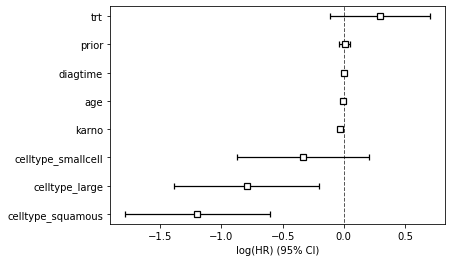

In [8]:
#plotting
model.plot()